# Introduction.

- **History.**
  - 2025.03.30, 1st summarization of the document.
  - 2025.04.04, revision of 0 ~ 2, export and post as markdown.
- **Library.**
  - `pandas`, 2.2.3, on Sep 20, 2024.
  - https://pandas.pydata.org/docs/

# 0. Setup.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%%html
<style>
    table {
        float: left;
        margin-right: 20px; /* Optional: Adds space between table and other content */
    }
</style>

# 1. Init.

## 1.1. by Variable.

In [ ]:
# from dictionary.
df = pd.DataFrame({
    'A': [1, 4, 7],
    'B': [2, 5, 8],
    'C': [3, 6, 9]
})

# from data, columns, and index.
data  = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]
cols  = ['A', 'B', 'C']
index = [1, 2, 3] 

df = pd.DataFrame(data=data, columns=cols, index=index)

## 1.2. `pd.read_csv()`: Reading a '.csv' file.

#### Signature.

In [ ]:
df  = pd.read_csv('./data/rainfall/train.csv.zip',                        # file path.
                  header          = 0,                                    # header idx.
                  names           = ['day', 'rainfall'],                  # col names (if no header provided).
                  index_col       = ['id'],                               # idx column.
                  usecols         = ['day', 'rainfall'],                  # cols to read.
                  dtype           = {'col1': 'int', 'col2': 'float'},     # dtype for each cols.
                  engine          = 'c',                                  # `c` for speed, `python` for more flexibility.
                  converters      = {'col1': lambda x: x**2},             # custom method.
                  true_values     = ['yes', 'true'],                      # values converted to `True`.
                  false_values    = ['no', 'false'],                      # values converted to `False`.
                  na_values       = ['NaN', 'None'],                      # values converted to `NaN`.
                  skiprows        = 2,                                    # lines to skip.
                  # skipfooter      = 3,                                  # lines to skip (from end). not supported with iterator, even if False.
                  nrows           = 5,                                    # max num of lines to read.
                  # verbose         = False,                              # print 'ms' to read. deprecated.
                  parse_dates     = ['day'],                              # 'date' col.
                  date_format     = '%Y-%m-%d',                           # date format of 'date' col.
                  iterator        = False,                                # return iterator, to reduce RAM.
                  chunksize       = 2,                                    # num of rows to return when using a `iterator`.
                  low_memory      = False,                                # set `True` if pandas incorrectly infers col types.
                  memory_map      = True,                                 # directly reads from a disk, use for very large file.
                  compression     = 'infer',                              # read compressed csv file.
                  doublequote     = True,                                 # if there is " inside of the field, preserves it.
                  quotechar       = "'",                                  # char for quote (instead of ").
                  encoding        = 'utf-8-sig',                          # encoding type for the file (for UnicodeDecodeError).
                  encoding_errors = 'strict',                             # 'strict': invokes err, 'ignore': skip chars, 'replace': with �, 'backslashreplace': with \xXX.
                  # storage_options = {'key': key, 'secret': secret},     # for cloud storage, e.g. AWS S3, GCS, etc.
                 )

### 1.2.1. Basic Usage.

In [ ]:
# Check the head for parsing.
df = pd.read_csv('data/rainfall/train.csv.zip', nrows=5)
display(df.head())

# Choose `usecols`.
usecols = [
    'day',                # nth date of the year.
    'pressure',           # air pressure.
    'maxtemp',            # max temperature at the date.
    'temparature',        # temperature at time.
    'mintemp',            # min temperature at the date. 
    'dewpoint',           # temperature that the air needs to be cooled to for 100% relative humidity.
    'humidity',           # humidity.
    'cloud',              # amount of cloud (?).
    'sunshine',           # amount of insolation (?).
    'winddirection',      # wind direction in degree (?).
    'windspeed',          # wind speed, m/s (?).
    'rainfall'            # whether raining or not. Target variable.
]

# Define simple converters.
converters = {
    'winddirection': lambda x: int(float(x)),    # int for degree, [0, 360].
}

# Specify the date column, if any. Note) real 'day' is just integer, [1, 365].
parse_dates = ['day']
date_format = '%Y-%m-%d %H:%M:%S'

# Load.
df = pd.read_csv('data/rainfall/train.csv.zip', 
                 usecols      = usecols, 
                 converters   = converters,
                 parse_dates  = parse_dates,          
                 date_format  = date_format)

display(df.head())

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60,17.2,1
1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50,21.9,1
2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70,18.1,1
3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60,35.6,1
4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40,24.8,0


> Note) `'parse_dates'` will converts into `datetime64`, which needs 16 bytes per value, which could increase memory usage.

### 1.2.2. Large Files.

In [ ]:
# Create the df.
df = pd.read_csv('data/rainfall/train.csv')     

# Write as '.csv.zip' file.
df.to_csv('data/rainfall/train.csv.zip',
          index         = False,                    # do not write 'Unnamed 0' column.
          compression   = 'zip') 
 
# Read the '.csv.zip' file. 
df = pd.read_csv('data/rainfall/train.csv.zip', 
                 compression  = 'zip',              # compression.
                 chunksize    = 5,                  # as an iterator.
                 memory_map   = True)               # memory mapping.

# Use iterator.
for df_chunk in df:
    display(df_chunk)
    
    break

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


> Note) You can't write to the file when a '`memory_map = True`'.

### 1.2.3. Encoding.

In [ ]:
df = pd.read_csv('data/rainfall/train.csv.zip',
                 encoding  = 'cp949')               # 'cp949' or 'utf-8-sig' for Korean.

## 1.3. `pd.date_range()`: `datetime` values.

In [ ]:
idx = pd.date_range(start    = '2025-01-01',
                    end      = '2025-01-02',
                    freq     = '12h')
pd.DataFrame(data=[1,2,3], columns=['A'], index=idx)

,A
2025-01-01 00:00:00,1
2025-01-01 12:00:00,2
2025-01-02 00:00:00,3


## 1.4. Index.

### 1.4.1. `df.setindex()` : Set index using existing column.

In [ ]:
df = pd.DataFrame({
    'year':  [2012, 2014, 2013, 2014],
    'month': [1, 4, 7, 10],
    'sale':  [55, 40, 84, 31]}
)
df.set_index('year')

,month,sale
year,,
2012,1,55
2014,4,40
2013,7,84
2014,10,31


### 1.4.2. `df.reindex()` : Reinitialize the index with the new value.

In [ ]:
index = ['A', 'B', 'C']
df    = pd.DataFrame({'col1': [1, 2, 3]},
                     index=index)
display(df)

new_index = ['A', 'B', 'c']
display(df.reindex(new_index))

,col1
A,1
B,2
C,3


,col1
A,1.0
B,2.0
c,NaN


> Note) If there is a new index, e.g. 'c', the value would be `NaN`, and since the `int` type can't represent `NaN`, the entire `col1` column is converted to `float`.

### 1.4.3. `df.reset_index()` : Reset index to '0, 1, ...'.

In [ ]:
df = pd.DataFrame([('bird', 389.0),
                   ('bird', 24.0),
                   ('mammal', 80.5),
                   ('mammal', np.nan)],
                  index=['A', 'B', 'C', 'D'],
                  columns=('class', 'max_speed'))
display(df)

display(df.reset_index(drop=True))     # If `True`, the new column `index` will be created.

,class,max_speed
A,bird,389.0
B,bird,24.0
C,mammal,80.5
D,mammal,NaN


,class,max_speed
0,bird,389.0
1,bird,24.0
2,mammal,80.5
3,mammal,NaN


## 1.4. Rename.

In [ ]:
df = pd.DataFrame(data     = [[1, 2], [3, 4], [5, 6]],
                  columns  = ['A', 'B'],
                  index    = [0, 1, 2])

df.rename(columns  = {'A': 'a', 'B': 'b'},
          index    = {0: 'x', 1: 'y', 2: 'z'})

,a,b
x,1,2
y,3,4
z,5,6


# 2. Null Handling.

## 2.1. Check.

In [ ]:
df = pd.DataFrame({
    'A': [1, None],
    'B': [3, 4]
})
display(df)

print(df.isnull().sum(), '\n')    # 'True' if null.
print(df.notnull().sum())         # 'True' if not null.

,A,B
0,1.0,3
1,NaN,4


A    1
B    0
dtype: int64 

A    1
B    2
dtype: int64


## 2.2. Drop.

In [ ]:
df.dropna()                    # drop rows with any null.
df.dropna(axis = 1)            # drop cols with any null.
df.dropna(subset=['A'])        # drop rows with specified columns.

,A,B
0,1.0,3


## 2.3. Impute.

In [ ]:
# fill with the single value.
display(df.fillna(0))                   

# fill with the value for each col.
impute_val = {               
    'A': 'a',
}
display(df.fillna(impute_val))

# fill with the prev/next.
display(df.ffill())         # prev.
display(df.bfill())         # next.

,A,B
0,1.0,3
1,0.0,4


,A,B
0,1.0,3
1,a,4


,A,B
0,1.0,3
1,1.0,4


,A,B
0,1.0,3
1,NaN,4


## 2.4. Interpolate.

In [ ]:
df.interpolate(method='linear', limit=2)   # impute 2 consecutive nulls at most.

,A,B
0,1.0,3
1,1.0,4


### c.f. Interpolation Methods.

| Method        | Formula                                                                 |
|---------------|-------------------------------------------------------------------------|
| **'linear'**   | $y = y_1 + \frac{(y_2 - y_1)}{(x_2 - x_1)} \times (x - x_1)$             |
| **'polynomial' (order=n)** | $y = a_0 + a_1 x + a_2 x^2 + \dots + a_n x^n$                |
| **'spline'**     | $S_i(x) = a_i + b_i(x - x_i) + c_i(x - x_i)^2 + d_i(x - x_i)^3$ |
| **'time'**     | $y = y_1 + \frac{(y_2 - y_1)}{(t_2 - t_1)} \times (t - t_1)$             |
| **'pad'**      | $y = y_{\text{previous known}}$                                         |
| **'bfill'**    | $y = y_{\text{next known}}$                                             |
| **'nearest'**  | $y = y_{\text{closest known}}$                                          |
| **'quadratic'**| $y = a x^2 + b x + c$                                                   |
| **'cubic'**    | $y = a x^3 + b x^2 + c x + d$                                           |


# 3. Indexing.

## 3.1. About `df`.

### 3.1.1. General.

In [ ]:
df.columns        # Column names.
df.index          # Index series.
df.to_numpy()     # Values (without columns). NOTE) DO NOT USE df.values.

df.dtypes         # Data types.
df.size           # Size (m * n).
df.shape          # Shape (m, n).

df.memory_usage(deep=True)     # Memory usage of each col, in bytes. 'deep=False' => count pointers, 'deep=True' => real values.

df.info(max_cols=10)           # if n_cols > 10, don't print each col.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1 non-null      float64
 1   B       2 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 160.0 bytes


### 3.1.2. Statistics.

In [ ]:
df = pd.DataFrame(np.random.rand(5, 3), columns=['A', 'B', 'C'])
print(df, '\n')

          A         B         C
0  0.656685  0.652786  0.187218
1  0.643924  0.342665  0.238570
2  0.934949  0.598127  0.955672
3  0.148692  0.760763  0.818679
4  0.279700  0.153102  0.063324 



#### `df.count(axis=0)` : Count non-null values. 

In [ ]:
df.count(axis=0)

A    5
B    5
C    5
dtype: int64

#### `df.diff()` : First discrete difference of element.

In [ ]:
df.diff(periods  = 1,    # 'periods': shift for calculating difference. Could be negative.
        axis     = 0)    # 'axis': 0 = each column, 1 = each row.

,A,B,C
0,NaN,NaN,NaN
1,-0.012761,-0.310121,0.051352
2,0.291025,0.255463,0.717102
3,-0.786257,0.162636,-0.136993
4,0.131008,-0.607662,-0.755355


#### `df.pct_change()` : % diff between the current and prev row.

In [ ]:
df.pct_change(periods=2)

,A,B,C
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,0.423741,-0.083731,4.104586
3,-0.769084,1.220139,2.431603
4,-0.700839,-0.744032,-0.933739


#### `df.kurt()` : Kurtosis of each column or row.
- $ \text{kurtosis} = \frac{1}{n} \sum \left( \frac{x_i - \bar{x}}{s} \right)^4 - 3 $
  - $s$ = standard deviation.
  - Higher $\text{Kurtosis}$ = heavier tails, i.e. more outliers.
  - $ \text{Kurtosis} = 0 $ → Normal distribution  
  - $ \text{Kurtosis} > 0 $ → **Leptokurtic**: heavy tails, sharp peak  
  - $ \text{Kurtosis} < 0 $ → **Platykurtic**: light tails, flat peak


In [ ]:
df.kurt(axis=0)          # 'axis': 0 = each column, 1 = each row.

A   -1.481508
B   -1.228441
C   -2.776806
dtype: float64

#### `df.mode()` : Most frequent value of each column or row.

In [ ]:
df.mode(axis           = 0,       # 'axis': 0 = each column, 1 = each row.
        numeric_only   = True,
        dropna         = True)

,A,B,C
0,0.148692,0.153102,0.063324
1,0.279700,0.342665,0.187218
2,0.643924,0.598127,0.238570
3,0.656685,0.652786,0.818679
4,0.934949,0.760763,0.955672


#### `df.quantile()` : Quantiles.

- `interpolation`: {'linear', 'lower', 'higher', 'midpoint', 'nearest'}
  - **linear**: $i + (j - i) \times \text{fraction}$, where *fraction* is the fractional part of the index between $i$ and $j$.
  - **lower**: $i$
  - **higher**: $j$
  - **nearest**: $i$ or $j$, whichever is nearest
  - **midpoint**: $(i + j) / 2$


In [ ]:
q = [.0, .25, .5, .75, .90, 1]
df.quantile(q,
            axis           = 0,
            numeric_only   = False,
            interpolation  = 'linear',
            )

,A,B,C
0.00,0.148692,0.153102,0.063324
0.25,0.279700,0.342665,0.187218
0.50,0.643924,0.598127,0.238570
0.75,0.656685,0.652786,0.818679
0.90,0.823643,0.717572,0.900875
1.00,0.934949,0.760763,0.955672


#### `df.rank()` : Rank of each sample.
- `'method'` : {'average', 'min', 'max', 'first', 'dense'}, *default* = 'average'  
How to rank the group of records that have the same value (i.e. ties):
  - **average**: average rank of the group  
  - **min**: lowest rank in the group  
  - **max**: highest rank in the group  
  - **first**: ranks assigned in order they appear in the array  
  - **dense**: like 'min', but rank always increases by 1 between groups


```python
# Signature:
df.rank(
    axis: 'Axis' = 0,
    method: "Literal['average', 'min', 'max', 'first', 'dense']" = 'average',
    numeric_only: 'bool_t' = False,
    na_option: "Literal['keep', 'top', 'bottom']" = 'keep',
    ascending: 'bool_t' = True,
    pct: 'bool_t' = False,
) -> 'Self'
```

In [ ]:
df.rank()

,A,B,C
0,4.0,4.0,2.0
1,3.0,2.0,3.0
2,5.0,3.0,5.0
3,1.0,5.0,4.0
4,2.0,1.0,1.0


In [ ]:
df.rank(pct=True)

,A,B,C
0,0.8,0.8,0.4
1,0.6,0.4,0.6
2,1.0,0.6,1.0
3,0.2,1.0,0.8
4,0.4,0.2,0.2


#### `df.duplicated()` : Check duplications of each column or row.

In [ ]:
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})
print(df, '\n')

df.duplicated(keep='first',       # 'first' = only first is False, 'last' = last is False, 'False' = all True.
              subset=['brand'])

     brand style  rating
0  Yum Yum   cup     4.0
1  Yum Yum   cup     4.0
2  Indomie   cup     3.5
3  Indomie  pack    15.0
4  Indomie  pack     5.0 



0    False
1     True
2    False
3     True
4     True
dtype: bool

#### Typical statistics.

In [ ]:
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6]
})

df.max()
df.min()
df.mean()
df.median()
df.var()
df.std()

df.prod()
df.sum()

df.round(1)          # e.g. 0.25 -> 0.3.
      
df.sem()             # sem = s / root(n).
df.skew()            # skew.
      
df.nunique()         # num of unique values.
df.value_counts()

A  B
1  4    1
2  5    1
3  6    1
Name: count, dtype: int64

- $ \text{SEM} = \frac{s}{\sqrt{n}} $
  - Measures how precisely the sample mean estimates the population mean.
  - Smaller SEM = more reliable mean estimate.
- $ \text{Skewness} = \frac{n}{(n - 1)(n - 2)} \sum \left( \frac{x_i - \bar{x}}{s} \right)^3 $
  - Measures the asymmetry of the distribution.  
    - Skewness = 0 → symmetric  
    - Skewness > 0 → right-skewed (tail to the right)  
    - Skewness < 0 → left-skewed (tail to the left)


## 3.2. Value.

### 3.2.1. By Location.

In [ ]:
# One value.
df.at[2, 'A']    
df.iat[2, 1]       

# Row.
df.loc[1]          
df.iloc[1]         

# Column.
df['A']
df.A

0    1
1    2
2    3
Name: A, dtype: int64

### 3.2.2. By Time.

#### `df.at_time()`: At specific time.

In [ ]:
i = pd.date_range('2018-04-09', periods=10, freq='3h')
df = pd.DataFrame({'A': range(10)}, index=i)
print(df, '\n')

# df.at_time().
print(df.at_time('12:00'))

                     A
2018-04-09 00:00:00  0
2018-04-09 03:00:00  1
2018-04-09 06:00:00  2
2018-04-09 09:00:00  3
2018-04-09 12:00:00  4
2018-04-09 15:00:00  5
2018-04-09 18:00:00  6
2018-04-09 21:00:00  7
2018-04-10 00:00:00  8
2018-04-10 03:00:00  9 

                     A
2018-04-09 12:00:00  4


#### `df.between_time()`: Between times.

In [ ]:
# df.between_time().
print(df.between_time('3:00', '9:00'))    # 3:00 ~ 9:00, inclusive.
print(df.between_time('5:00', '2:00'))    # NOT in 2:00 ~ 5:00.

                     A
2018-04-09 03:00:00  1
2018-04-09 06:00:00  2
2018-04-09 09:00:00  3
2018-04-10 03:00:00  9
                     A
2018-04-09 00:00:00  0
2018-04-09 06:00:00  2
2018-04-09 09:00:00  3
2018-04-09 12:00:00  4
2018-04-09 15:00:00  5
2018-04-09 18:00:00  6
2018-04-09 21:00:00  7
2018-04-10 00:00:00  8


#### `df.to_period()`: Access by time unit.

In [ ]:
idx = pd.to_datetime(
    [
        "2001-03-31 00:00:00",
        "2002-05-31 00:00:00",
        "2003-08-31 00:00:00",
    ]
)
idx.to_period("M")

PeriodIndex(['2001-03', '2002-05', '2003-08'], dtype='period[M]')

## 3.3. Iteration.

In [ ]:
# by row.
for idx, row in df.iterrows():
    print(idx)
    print(row)
    break

# by column.
for col_name, col in df.items():
    print(col_name)
    print(col)
    break

2018-04-09 00:00:00
A    0
Name: 2018-04-09 00:00:00, dtype: int64
A
2018-04-09 00:00:00    0
2018-04-09 03:00:00    1
2018-04-09 06:00:00    2
2018-04-09 09:00:00    3
2018-04-09 12:00:00    4
2018-04-09 15:00:00    5
2018-04-09 18:00:00    6
2018-04-09 21:00:00    7
2018-04-10 00:00:00    8
2018-04-10 03:00:00    9
Freq: 3h, Name: A, dtype: int64


## 3.4. Search.

In [ ]:
df

,A
2018-04-09 00:00:00,0
2018-04-09 03:00:00,1
2018-04-09 06:00:00,2
2018-04-09 09:00:00,3
2018-04-09 12:00:00,4
2018-04-09 15:00:00,5
2018-04-09 18:00:00,6
2018-04-09 21:00:00,7
2018-04-10 00:00:00,8
2018-04-10 03:00:00,9


### 3.4.1. By Value.

In [ ]:
# by column.
df['A'].isin([0]).any()   

# by row.
df.iloc[0].isin([0])        

A    True
Name: 2018-04-09 00:00:00, dtype: bool

### 3.4.2. By Condition.

In [ ]:
# Query.
df.query('A == 0')
df[df['A'] == 0]     # could be slightly faster and memory efficient.

# Condition and replace.
is_one = lambda df: df['A'] == 1
df['A'].where(cond = is_one(df),            # if 'cond' is false, replace with 'other'.
                     other = 'no_one')
df['A'].mask(cond = is_one(df),
                    other = 'one')          # if 'cond' is True, replace with 'other'.

# Index of max/min value.
df.idxmax()
df.idxmin()

A   2018-04-09
dtype: datetime64[ns]

### 3.4.3. By Column or Index Name.

In [ ]:
df = pd.DataFrame(np.array(([1, 2, 3], [4, 5, 6])),
                  index=['mouse', 'rabbit'],
                  columns=['one', 'two', 'three'])
print(df)

df.filter(items=['one', 'three'])
df.filter(regex='w$', axis=1)        # 'axis' : 0 = by index, 1 = by column.
df.filter(like='bbi', axis=0)        # Index containing 'bbi'.

        one  two  three
mouse     1    2      3
rabbit    4    5      6


,one,two,three
rabbit,4,5,6


### 3.4.4. By Date.

#### `df.asof()`: find the first non-NaN value before given date.

In [ ]:
df = pd.DataFrame({'a': [10., 20., 30., 40., 50.],
                   'b': [None, None, None, None, 500]},
                  index=pd.DatetimeIndex(['2018-02-27 09:01:00',
                                          '2018-02-27 09:02:00',
                                          '2018-02-27 09:03:00',
                                          '2018-02-27 09:04:00',
                                          '2018-02-27 09:05:00']))

df.asof(pd.DatetimeIndex(['2018-02-27 09:03:30',
                          '2018-02-27 09:04:30']),
        subset=['a'])

,a,b
2018-02-27 09:03:30,30.0,NaN
2018-02-27 09:04:30,40.0,NaN


### 3.4.5. Valid Value.

#### `df.first_valid_index()`: find the fist index of the non-NaN value.

In [ ]:
s = pd.Series([None, 3, 4])

print(s.first_valid_index())
print(s.last_valid_index())

1
2


## 3.5. Aggregation.

In [ ]:
df = pd.DataFrame(np.random.rand(3, 3), columns=['A', 'B', 'C'])
df

,A,B,C
0,0.652663,0.186434,0.319513
1,0.157815,0.160488,0.171617
2,0.210212,0.878190,0.572742


### 3.5.1. Aggregation.

In [ ]:
# Each row.
df.agg(['sum'], axis=0)   # 0 = each row, 1 = each column.


,A,B,C
sum,1.020691,1.225112,1.063872


> c.f. Aggregation Functions.
| Function   | Description |
|------------|-------------|
| **`'sum'`**     | Sum of values in each column. |
| **`'min'`**     | Minimum value in each column. |
| **`'max'`**     | Maximum value in each column. |
| **`'mean'`**    | Average (mean) of each column. |
| **`'median'`**  | Median value of each column. |
| **`'std'`**     | Standard deviation of each column. |
| **`'var'`**     | Variance of each column. |
| **`'count'`**   | Number of non-null values in each column. |
| **`'nunique'`** | Number of unique values in each column. |
| **`'first'`**   | First value in each column. |
| **`'last'`**    | Last value in each column. |
| **`'prod'`**    | Product of all values in each column. |
| **`'sem'`**     | Standard error of the mean. |
| **`'skew'`**    | Skewness of the distribution. |
| **`'kurt'`**    | Kurtosis (measure of tailedness). |

### 3.5.2. Culmulative Operations.

In [ ]:
# df.cummax().
df.cummax()

# df.cummin().
df.cummin()

# df.cumsum().
df.cumsum()

# df.cumprod().
df.cumprod()

,A,B,C
0,0.652663,0.186434,0.319513
1,0.103000,0.029920,0.054834
2,0.021652,0.026276,0.031406


## 3.6. Correlation Analysis.

- Pearson.
  - $ r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}} $
- Spearman's rank. 
  - $ \rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)} $
  - where $d_i$ is the difference between the ranks of each observation pair, and $n$ is the number of observations.
- Kendall's tau.
  - $ \tau = \frac{(C - D)}{\frac{1}{2}n(n - 1)} $
  - where $C$ is the number of concordant pairs, $D$ is the number of discordant pairs, and $n$ is the number of observations.
  - **Concordant pair (C)**: For a pair of observations $(x_i, y_i)$ and $(x_j, y_j)$, the pair is **concordant** if the order of both $x$ and $y$ agree:  
    - i.e., if $x_i > x_j$ and $y_i > y_j$, or $x_i < x_j$ and $y_i < y_j$
  - **Discordant pair (D)**: The pair is **discordant** if the order of $x$ and $y$ disagree:  
    - i.e., if $x_i > x_j$ and $y_i < y_j$, or $x_i < x_j$ and $y_i > y_j$
  - Tied pairs (where $x_i = x_j$ or $y_i = y_j$) are typically excluded in Kendall's tau-b and tau-c variants.

- How to choose:
| Scenario                                      | Recommended Correlation | Notes                                                                 |
|----------------------------------------------|--------------------------|-----------------------------------------------------------------------|
| Linear relationship, continuous variables     | Pearson                 | Assumes normal distribution and linearity                             |
| Monotonic (but not necessarily linear)        | Spearman                | Based on rank; robust to outliers and non-linearity                   |
| Ordinal variables or many ties in the data    | Kendall                 | Better for small datasets or with many tied ranks                     |
| Non-parametric, resistant to outliers         | Spearman or Kendall     | Both are rank-based and don't assume normality                        |


```python
# Signature.
df.corr(
    method: 'CorrelationMethod' = 'pearson',     # {‘pearson’, ‘kendall’, ‘spearman’} or callable
    min_periods: 'int' = 1,                      # Minimum number of observations required per pair of columns to have a valid result.
    numeric_only: 'bool' = False,                # Include only float, int or boolean data.
) -> 'DataFrame'   
   
df.corrwith(   
    other: 'DataFrame | Series',   
    axis: 'Axis' = 0,   
    drop: 'bool' = False,                        # Drop missing indices from result.
    method: 'CorrelationMethod' = 'pearson',
    numeric_only: 'bool' = False,
) -> 'Series'

df.cov(
    min_periods: 'int | None' = None,
    ddof: 'int | None' = 1,
    numeric_only: 'bool' = False,
) -> 'DataFrame'
```

In [ ]:
# Example.

# df.corr().
df = pd.DataFrame([(.2, .3), (.0, .6), (.6, .0), (.2, .1)],
                  columns=['dogs', 'cats'])
print(df, '\n')
print(df.corr(), '\n')


# df.corrwith().
index       = ["a", "b", "c", "d", "e"]
columns     = ["one", "two", "three", "four"]
df1         = pd.DataFrame(np.arange(20).reshape(5, 4), index=index, columns=columns)
df2         = pd.DataFrame(np.arange(16).reshape(4, 4), index=index[:4], columns=columns)

print(df1, '\n')
print(df2, '\n')
print(df1.corrwith(df2), '\n')

# df.cov().
print(df.cov())

   dogs  cats
0   0.2   0.3
1   0.0   0.6
2   0.6   0.0
3   0.2   0.1 

          dogs      cats
dogs  1.000000 -0.851064
cats -0.851064  1.000000 

   one  two  three  four
a    0    1      2     3
b    4    5      6     7
c    8    9     10    11
d   12   13     14    15
e   16   17     18    19 

   one  two  three  four
a    0    1      2     3
b    4    5      6     7
c    8    9     10    11
d   12   13     14    15 

one      1.0
two      1.0
three    1.0
four     1.0
dtype: float64 

          dogs      cats
dogs  0.063333 -0.056667
cats -0.056667  0.070000


In [ ]:
index = ["a", "b", "c", "d", "e"]
columns = ["one", "two", "three", "four"]
df1 = pd.DataFrame(np.arange(20).reshape(5, 4), index=index, columns=columns)
df2 = pd.DataFrame(np.arange(16).reshape(4, 4), index=index[:4], columns=columns)
print(df1, '\n')
print(df2, '\n')
df1.corrwith(df2)

   one  two  three  four
a    0    1      2     3
b    4    5      6     7
c    8    9     10    11
d   12   13     14    15
e   16   17     18    19 

   one  two  three  four
a    0    1      2     3
b    4    5      6     7
c    8    9     10    11
d   12   13     14    15 



one      1.0
two      1.0
three    1.0
four     1.0
dtype: float64

## 3.7. Sampling.

### 3.7.1. `df.sample()` : Random sampling.

```python
# Signature.
df.sample(
    n: 'int | None' = None,
    frac: 'float | None' = None,
    replace: 'bool_t' = False,
    weights= 'str | ndarray-like' = None,
    random_state: 'RandomState | None' = None,
    axis: 'Axis | None' = None,
    ignore_index: 'bool_t' = False,
) -> 'Self'
```

In [ ]:
df

,dogs,cats
0,0.2,0.3
1,0.0,0.6
2,0.6,0.0
3,0.2,0.1


In [ ]:
df = pd.DataFrame({
    'A': [0, 1, 2],
    'B': [3, 4, 5]
})

df.sample(
    n              = 2,                  # n_samples.
    # frac           = 0.2,              # frac. can't use with 'n'.
    replace        = False,              # If 'True', allows duplications.
    weights        = [0.2, 0.5, 0.3],    # Weights on each samples. 'None' = equal weighting.
    random_state   = 42,                 # Random seed.
    axis           = 0,                  # 0 for index, 1 for column.
    ignore_index   = False               # If 'False', returns index of [0, 1, ...].
)

,A,B
1,1,4
2,2,5


### 3.7.2. `df.resample()`: Resamples based on time.

In [ ]:
index = pd.date_range('1/1/2000', periods=9, freq='min')
series = pd.Series(range(9), index=index)
display(series)

# Downsampling.
series.resample('3min',                 # by 3 mins.
                label='right',          # 0 ~ 3 => 3.
                closed='right',         # [0, 3].
                ).sum()    

2000-01-01 00:00:00    0
2000-01-01 00:01:00    1
2000-01-01 00:02:00    2
2000-01-01 00:03:00    3
2000-01-01 00:04:00    4
2000-01-01 00:05:00    5
2000-01-01 00:06:00    6
2000-01-01 00:07:00    7
2000-01-01 00:08:00    8
Freq: min, dtype: int64

2000-01-01 00:00:00     0
2000-01-01 00:03:00     6
2000-01-01 00:06:00    15
2000-01-01 00:09:00    15
Freq: 3min, dtype: int64

In [ ]:
# Upsampling.
series.resample('30s').ffill()[:5]

2000-01-01 00:00:00    0
2000-01-01 00:00:30    0
2000-01-01 00:01:00    1
2000-01-01 00:01:30    1
2000-01-01 00:02:00    2
Freq: 30s, dtype: int64

## 3.7. Truncation.

In [ ]:
# Data.
df = pd.DataFrame({'A': ['a', 'b', 'c', 'd', 'e'],
                   'B': ['f', 'g', 'h', 'i', 'j'],
                   'C': ['k', 'l', 'm', 'n', 'o']})
df.index = pd.date_range(start='2016-01-01', periods=len(df), freq='D')
display(df)

# By index.
df.truncate(before=2, after=4)

# By columns.
df.truncate(before="A", after="B", axis="columns")

# By index, Timestamp.
df.truncate(before=pd.Timestamp('2016-01-05'),
            after=pd.Timestamp('2016-01-10'))

,A,B,C
2016-01-01,a,f,k
2016-01-02,b,g,l
2016-01-03,c,h,m
2016-01-04,d,i,n
2016-01-05,e,j,o


,A,B,C
2016-01-05,e,j,o


## 3.8. Compare.

```python
Signature:
df.compare(
    other: 'DataFrame',
    align_axis: 'Axis' = 1,
    keep_shape: 'bool' = False,
    keep_equal: 'bool' = False,
    result_names: 'Suffixes' = ('self', 'other'),
) -> 'DataFrame'

Docstring:
Compare to another DataFrame and show the differences.
```

In [ ]:
df = pd.DataFrame(
    {
        "col1": ["a", "a", "b", "b", "a"],
        "col2": [1.0, 2.0, 3.0, np.nan, 5.0],
        "col3": [1.0, 2.0, 3.0, 4.0, 5.0]
    },
    columns=["col1", "col2", "col3"],
)
display(df)

df2 = df.copy()
df2.loc[0, 'col1'] = 'c'
df2.loc[2, 'col3'] = 4.0
display(df2)

df.compare(df2, 
           result_names   = ('df', 'df2'), 
           align_axis     = 0,                 # print on the index.
           keep_equal     = True,              # keep equal values instead of NaN.
           keep_shape     = True)              

,col1,col2,col3
0,a,1.0,1.0
1,a,2.0,2.0
2,b,3.0,3.0
3,b,NaN,4.0
4,a,5.0,5.0


,col1,col2,col3
0,c,1.0,1.0
1,a,2.0,2.0
2,b,3.0,4.0
3,b,NaN,4.0
4,a,5.0,5.0


col1  col2  col3
0 df     a   1.0   1.0
  df2    c   1.0   1.0
1 df     a   2.0   2.0
  df2    a   2.0   2.0
2 df     b   3.0   3.0
  df2    b   3.0   4.0
3 df     b   NaN   4.0
  df2    b   NaN   4.0
4 df     a   5.0   5.0
  df2    a   5.0   5.0

# 4. Manipulation.

## 4.1. Append.

In [ ]:
df

,col1,col2,col3
0,a,1.0,1.0
1,a,2.0,2.0
2,b,3.0,3.0
3,b,NaN,4.0
4,a,5.0,5.0


In [ ]:
df = pd.DataFrame({
    'A': [0, 1, 2],
    'B': [3, 4, 5]
})

# Add column, at last.
df['A'] = df['A'].astype(bool)

# Add column, at specific location.
df.insert(1, 'C', df['A'].mean())    # between 0 and 1. change the original df!

# Add row.
new_rows = df.tail(3)
pd.concat([df, new_rows], ignore_index=True)   # allocate a new index.

,A,C,B
0,False,0.666667,3
1,True,0.666667,4
2,True,0.666667,5
3,False,0.666667,3
4,True,0.666667,4
5,True,0.666667,5


## 4.2. Delete.

### 4.2.1. Drop Columns.

In [ ]:
# df.drop().
df.drop(columns=['C'], inplace=True)

# df.pop(). Only single column name allowed.
df.pop('B') 

0    3
1    4
2    5
Name: B, dtype: int64

### 4.2.2. Drop Rows.

In [ ]:
df.drop(index=df.tail(2).index)

,A
0,False


### 4.2.3. Drop Duplicates.

In [ ]:
df.drop_duplicates(subset         = ['A'],
                   keep           = 'first',     # {'first', 'last'}.
                   inplace        = False,
                   ignore_index   = False)

,A
0,False
1,True


## 4.3. Merge.

### 4.3.1. `df.combine()` : Overwrite.

In [ ]:
# Create df2, where 'temperature' is fah.
df2 = df.copy()
df2['A'] = df['A'] * 9/5 + 32

# If df['rainfall'] == 1, replace that row with df2.
def select_temp(col1, col2):
    return col1.mask(df['A'] == 1, col2)
df.combine(df2, select_temp)

# Overwrite any null in df with df2.
df.combine_first(df2)

,A
0,False
1,True
2,True


### 4.3.2. `df.align()` : by Column or Index.

In [ ]:
df = pd.DataFrame(
    [[1, 2, 3, 4], [6, 7, 8, 9]], columns=["D", "B", "E", "A"], index=[1, 2]
)
other = pd.DataFrame(
    [[10, 20, 30, 40], [60, 70, 80, 90], [600, 700, 800, 900]],
    columns=["A", "B", "C", "D"],
    index=[2, 3, 4],
)

print('# Data.')
print(df, '\n')
print(other, '\n')

# Align on columns.
left, right = df.align(other, join="outer", axis=1)
print('# On columns.')
print(left, '\n')
print(right, '\n')

# Align on the index.
left, right = df.align(other, join="outer", axis=0)
print('# On the index.')
print(left, '\n')
print(right, '\n')

# Align on both columns and the index.
left, right = df.align(other, join="outer", axis=None)
print('# On both.')
print(left, '\n')
print(right, '\n')

# Data.
   D  B  E  A
1  1  2  3  4
2  6  7  8  9 

     A    B    C    D
2   10   20   30   40
3   60   70   80   90
4  600  700  800  900 

# On columns.
   A  B   C  D  E
1  4  2 NaN  1  3
2  9  7 NaN  6  8 

     A    B    C    D   E
2   10   20   30   40 NaN
3   60   70   80   90 NaN
4  600  700  800  900 NaN 

# On the index.
     D    B    E    A
1  1.0  2.0  3.0  4.0
2  6.0  7.0  8.0  9.0
3  NaN  NaN  NaN  NaN
4  NaN  NaN  NaN  NaN 

       A      B      C      D
1    NaN    NaN    NaN    NaN
2   10.0   20.0   30.0   40.0
3   60.0   70.0   80.0   90.0
4  600.0  700.0  800.0  900.0 

# On both.
     A    B   C    D    E
1  4.0  2.0 NaN  1.0  3.0
2  9.0  7.0 NaN  6.0  8.0
3  NaN  NaN NaN  NaN  NaN
4  NaN  NaN NaN  NaN  NaN 

       A      B      C      D   E
1    NaN    NaN    NaN    NaN NaN
2   10.0   20.0   30.0   40.0 NaN
3   60.0   70.0   80.0   90.0 NaN
4  600.0  700.0  800.0  900.0 NaN 



### 4.3.3. `df.reindex_like()` : Reindex with given df.

In [ ]:
df1 = pd.DataFrame([[24.3, 75.7, 'high'],
                    [31, 87.8, 'high'],
                    [22, 71.6, 'medium'],
                    [35, 95, 'medium']],
                   columns=['temp_celsius', 'temp_fahrenheit',
                            'windspeed'],
                   index=pd.date_range(start='2014-02-12',
                                       end='2014-02-15', freq='D'))
print(df1, '\n')

df2 = pd.DataFrame([[28, 'low'],
                    [30, 'low'],
                    [35.1, 'medium']],
                   columns=['temp_celsius', 'windspeed'],
                   index=pd.DatetimeIndex(['2014-02-12', '2014-02-13',
                                           '2014-02-15']))
print(df2, '\n')

df2.reindex_like(df1)

            temp_celsius  temp_fahrenheit windspeed
2014-02-12          24.3             75.7      high
2014-02-13          31.0             87.8      high
2014-02-14          22.0             71.6    medium
2014-02-15          35.0             95.0    medium 

            temp_celsius windspeed
2014-02-12          28.0       low
2014-02-13          30.0       low
2014-02-15          35.1    medium 



,temp_celsius,temp_fahrenheit,windspeed
2014-02-12,28.0,NaN,low
2014-02-13,30.0,NaN,low
2014-02-14,NaN,NaN,NaN
2014-02-15,35.1,NaN,medium


### 4.3.4. `df.join()`: merge with the same `key` column.

In [ ]:
df = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3', 'K4', 'K5'],
                   'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5']})
other = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
                      'B': ['B0', 'B1', 'B2']})
display(df)
display(other)

df.join(other.set_index('key'), on='key')

,key,A
0,K0,A0
1,K1,A1
2,K2,A2
3,K3,A3
4,K4,A4
5,K5,A5


,key,B
0,K0,B0
1,K1,B1
2,K2,B2


,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,NaN
4,K4,A4,NaN
5,K5,A5,NaN


### 4.3.5. `df.merge()`: merge with various `key` and selections.

In [ ]:
df1 = pd.DataFrame({'a': ['foo', 'bar'], 'b': [1, 2]})
df2 = pd.DataFrame({'a': ['foo', 'baz'], 'c': [3, 4]})

display(df1)
display(df2)

display(df1.merge(df2, how='inner', on='a'))    # only rows with the shared key.
display(df1.merge(df2, how='left', on='a'))     # use left's key.
display(df1.merge(df2, how='right', on='a'))    # use right's key.

,a,b
0,foo,1
1,bar,2


,a,c
0,foo,3
1,baz,4


,a,b,c
0,foo,1,3


,a,b,c
0,foo,1,3.0
1,bar,2,NaN


,a,b,c
0,foo,1.0,3
1,baz,NaN,4


### 4.3.6. `df.update()`: update values using other df.

In [ ]:
df = pd.DataFrame({'A': [1, 2, 3],
                   'B': [400, 500, 600]})
new_df = pd.DataFrame({'B': [4, 5, 6],    
                       'C': ['a', 'b', 'c']})      # column 'C' does not update.
df.update(new_df)
df

,A,B
0,1,4
1,2,5
2,3,6


In [ ]:
df = pd.DataFrame({'A': ['a', 'b', 'c'],
                   'B': ['x', 'y', 'z']})
new_df = pd.DataFrame({'B': ['d', 'e', 'f', 'g', 'h', 'i']})   # ['g', 'h', 'i'] does not update.
df.update(new_df)
df

,A,B
0,a,d
1,b,e
2,c,f


In [ ]:
# Cross.
df1 = pd.DataFrame({'left': ['foo', 'bar']})
df2 = pd.DataFrame({'right': [7, 8]})

display(df1)
display(df2)

df1.merge(df2, how='cross')

,left
0,foo
1,bar


,right
0,7
1,8


,left,right
0,foo,7
1,foo,8
2,bar,7
3,bar,8


## 4.4. Apply.

In [ ]:
df

,A,B
0,a,d
1,b,e
2,c,f


In [ ]:
df = pd.read_csv('data/rainfall/train.csv.zip')

# Column-wise.
df['temparature'].apply(lambda x: x * 9/5 + 32)

# Row-wise.
df.apply(lambda row: 'Hot' if row['temparature'] > 20 else 'Normal', axis=1)

# Pipeline.
df_after = df.copy()
def to_fahrenheit(df):
    df['temparature'] = df['temparature'] * 9/5 + 32
    return df

def categorize_temp(df):
    df['temparature'] = df['temparature'].apply(lambda x: 'Hot' if x > 60 else 'Cold')
    return df

(df_after.pipe(to_fahrenheit)
         .pipe(categorize_temp)
)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,Hot,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,Hot,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,Hot,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,Hot,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,Hot,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2185,361,1014.6,23.2,Hot,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1
2186,2186,362,1012.4,17.2,Hot,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1
2187,2187,363,1013.3,19.0,Hot,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1
2188,2188,364,1022.3,16.4,Cold,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1


## 4.5. Convert dtype.

In [ ]:
df['day'].astype('int32')

0         1
1         2
2         3
3         4
4         5
       ... 
2185    361
2186    362
2187    363
2188    364
2189    365
Name: day, Length: 2190, dtype: int32

## 4.6. Rolling.

```python
Signature:
df.rolling(
    window: 'int | dt.timedelta | str | BaseOffset | BaseIndexer',  # window size.
    min_periods: 'int | None' = None,  # min num of samples per a window.
    center: 'bool_t' = False,          # if `True`, use the center, `False`, use the last one.
    win_type: 'str | None' = None,     # scipy.signal window function.
    # on: 'str | None' = None,
    # axis: 'Axis | lib.NoDefault' = <no_default>,
    closed: 'IntervalClosedType | None' = None,  # 'right' (default): exclude the FIRST, 'left', 'both': no exclusion, 'neither'.
    step: 'int | None' = None,         # step size to calculate the result. only works with window='int'. default=1.
    # method: 'str' = 'single',
) -> 'Window | Rolling'

Docstring:
Provide rolling window calculations.
```

In [ ]:
# Sample df.
df = pd.DataFrame({'data': range(10)}, index=pd.date_range('2024-01-01', periods=10, freq='D'))

# Integer window (fixed number of observations).
df['mean'] = df['data'].rolling(window=3, min_periods=2).mean()

# Timedelta window (variable-sized based on time).
df['sum'] = df['data'].rolling(window='3D').sum()

# BaseIndexer subclass (custom window boundaries).
from pandas.api.indexers import FixedForwardWindowIndexer

class CustomIndexer(FixedForwardWindowIndexer):
    def get_window_bounds(self, num_values, min_periods, center, closed, step):
        start = np.arange(num_values, dtype=np.int64)  
        end = start + 3
        return start, end.astype(np.int64)  


df['min'] = df['data'].rolling(window=CustomIndexer(window_size=3)).min()

# df.expanding(): accumulative application.
df['expanded_sum'] = df['data'].expanding(min_periods=2).sum()

df

,data,mean,sum,min,expanded_sum
2024-01-01,0,NaN,0.0,0.000000e+00,NaN
2024-01-02,1,0.5,1.0,1.000000e+00,1.0
2024-01-03,2,1.0,3.0,2.000000e+00,3.0
2024-01-04,3,2.0,6.0,3.000000e+00,6.0
2024-01-05,4,3.0,9.0,4.000000e+00,10.0
2024-01-06,5,4.0,12.0,5.000000e+00,15.0
2024-01-07,6,5.0,15.0,6.000000e+00,21.0
2024-01-08,7,6.0,18.0,7.000000e+00,28.0
2024-01-09,8,7.0,21.0,8.000000e+00,36.0
2024-01-10,9,8.0,24.0,-5.648292e-311,45.0


> c.f. A list of timedelta str: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases  
> scipy.signal window function: https://docs.scipy.org/doc/scipy/reference/signal.windows.html#module-scipy.signal.windows

> Note) If you need a weighted rolling, check `df.ewm()`.

## 4.7. Simple Functions.

#### `df.abs()`.

In [ ]:
df.abs()

,data,mean,sum,min,expanded_sum
2024-01-01,0,NaN,0.0,0.000000e+00,NaN
2024-01-02,1,0.5,1.0,1.000000e+00,1.0
2024-01-03,2,1.0,3.0,2.000000e+00,3.0
2024-01-04,3,2.0,6.0,3.000000e+00,6.0
2024-01-05,4,3.0,9.0,4.000000e+00,10.0
2024-01-06,5,4.0,12.0,5.000000e+00,15.0
2024-01-07,6,5.0,15.0,6.000000e+00,21.0
2024-01-08,7,6.0,18.0,7.000000e+00,28.0
2024-01-09,8,7.0,21.0,8.000000e+00,36.0
2024-01-10,9,8.0,24.0,5.648292e-311,45.0


#### `df.clip()`.

In [ ]:
df.clip(-2, 2)

,data,mean,sum,min,expanded_sum
2024-01-01,0,NaN,0.0,0.000000e+00,NaN
2024-01-02,1,0.5,1.0,1.000000e+00,1.0
2024-01-03,2,1.0,2.0,2.000000e+00,2.0
2024-01-04,2,2.0,2.0,2.000000e+00,2.0
2024-01-05,2,2.0,2.0,2.000000e+00,2.0
2024-01-06,2,2.0,2.0,2.000000e+00,2.0
2024-01-07,2,2.0,2.0,2.000000e+00,2.0
2024-01-08,2,2.0,2.0,2.000000e+00,2.0
2024-01-09,2,2.0,2.0,2.000000e+00,2.0
2024-01-10,2,2.0,2.0,-5.648292e-311,2.0


#### `df.all()` and `df.any()`.

In [ ]:
df.all()              # 'True' if all elems are 'True'.
df.any()              # 'False' if any elem is 'False'.

data            True
mean            True
sum             True
min             True
expanded_sum    True
dtype: bool

#### `df.add_prefix()` and `df.add_suffix()`.

In [ ]:
df.add_prefix('col_', axis=1)    # 'A' -> 'col_A'.
df.add_suffix('col_', axis=1)    # 'A' -> 'A_col'.

,datacol_,meancol_,sumcol_,mincol_,expanded_sumcol_
2024-01-01,0,NaN,0.0,0.000000e+00,NaN
2024-01-02,1,0.5,1.0,1.000000e+00,1.0
2024-01-03,2,1.0,3.0,2.000000e+00,3.0
2024-01-04,3,2.0,6.0,3.000000e+00,6.0
2024-01-05,4,3.0,9.0,4.000000e+00,10.0
2024-01-06,5,4.0,12.0,5.000000e+00,15.0
2024-01-07,6,5.0,15.0,6.000000e+00,21.0
2024-01-08,7,6.0,18.0,7.000000e+00,28.0
2024-01-09,8,7.0,21.0,8.000000e+00,36.0
2024-01-10,9,8.0,24.0,-5.648292e-311,45.0


#### `df.equals()`.

In [ ]:
df  = pd.DataFrame({1: [10], 2: [20]})
df2 = pd.DataFrame({1: [10], 2: [20]})

df.equals(df2)

True

#### `df.shift()`.

In [ ]:
df = pd.DataFrame({"Col1": [10, 20, 15, 30, 45],
                   "Col2": [13, 23, 18, 33, 48],
                   "Col3": [17, 27, 22, 37, 52]},
                  index=pd.date_range("2020-01-01", "2020-01-05"))
display(df)

# Shift by row.
display(df.shift(periods=3))

# Shift by column.
display(df.shift(periods=1, axis=1, fill_value=-1))    # fill values.

# Shift by multiple rows.
df['Col1'].shift(periods=[0, 1, 2])

,Col1,Col2,Col3
2020-01-01,10,13,17
2020-01-02,20,23,27
2020-01-03,15,18,22
2020-01-04,30,33,37
2020-01-05,45,48,52


,Col1,Col2,Col3
2020-01-01,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN
2020-01-04,10.0,13.0,17.0
2020-01-05,20.0,23.0,27.0


,Col1,Col2,Col3
2020-01-01,-1,10,13
2020-01-02,-1,20,23
2020-01-03,-1,15,18
2020-01-04,-1,30,33
2020-01-05,-1,45,48


,Col1_0,Col1_1,Col1_2
2020-01-01,10,NaN,NaN
2020-01-02,20,10.0,NaN
2020-01-03,15,20.0,10.0
2020-01-04,30,15.0,20.0
2020-01-05,45,30.0,15.0


## 4.8. Operations.

In [ ]:
# dot product.
df1 = pd.DataFrame([[1, 2], [3, 4]])
df2 = pd.DataFrame([[5, 6], [7, 8]])

display(df1)
display(df2)

result = df1 @ df2
print(result)

,0,1
0,1,2
1,3,4


,0,1
0,5,6
1,7,8


    0   1
0  19  22
1  43  50


## 4.9. Replace.

In [ ]:
df = pd.DataFrame({'A': [0, 1, 2, 3, 4],
                   'B': [5, 6, 7, 8, 9],
                   'C': ['a', 'b', 'c', 'd', 'e']})

# Scalar. e.g. 1 -> 5.
df.replace(1, 5)

# List. e.g. [0, 1] -> [1, 2].
df.replace([0, 1], [1, 2])

# Dict. e.g. 1 -> one, 2 -> two.
df.replace({1: 'one', 2: 'two'})

# Dict. e.g. 'A': 0, 'B': 5 -> 100.
df.replace({'A': 0, 'B': 5}, 100)

# Dict. e.g. 'A': {1 -> 100, 2 -> 200}.
df.replace({'A': {1: 100, 2: 200}})

# Dict. e.g. regex -> value.
df.replace(regex=r'^ba.$', value='new')    # replace strs containing '_ba_' with 'new'.

,A,B,C
0,0,5,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


## 4.10. Pivot.

#### 4.10.1. `df.pivot()` : Rearrange the axis.

In [ ]:
df = pd.DataFrame({
       "lev1": [1, 1, 1, 2, 2, 2],
       "lev2": [1, 1, 2, 1, 1, 2],
       "lev3": [1, 2, 1, 2, 1, 2],
       "lev4": [1, 2, 3, 4, 5, 6],
       "values": [0, 1, 2, 3, 4, 5]})
print(df, '\n')

df.pivot(index="lev1", columns=["lev2", "lev3"], values="values")

   lev1  lev2  lev3  lev4  values
0     1     1     1     1       0
1     1     1     2     2       1
2     1     2     1     3       2
3     2     1     2     4       3
4     2     1     1     5       4
5     2     2     2     6       5 



lev2    1         2     
lev3    1    2    1    2
lev1                    
1     0.0  1.0  2.0  NaN
2     4.0  3.0  NaN  5.0

#### 4.10.2. `pd.pivot_table()` : Pivot as a table.

In [ ]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                         "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})
print(df, '\n')

table = pd.pivot_table(df, 
                       index=['A', 'B'],
                       columns=['C'], 
                       values='D', 
                       aggfunc="sum")
table

     A    B      C  D  E
0  foo  one  small  1  2
1  foo  one  large  2  4
2  foo  one  large  2  5
3  foo  two  small  3  5
4  foo  two  small  3  6
5  bar  one  large  4  6
6  bar  one  small  5  8
7  bar  two  small  6  9
8  bar  two  large  7  9 



C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

### 4.10.3. Unpivot.

#### `df.melt()`: melts column(s).

In [ ]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})
display(df)

df.melt(id_vars=['A'], value_vars=['B', 'C'],
        var_name='My Var', value_name='My Value')

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


,A,My Var,My Value
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


#### `df.explode()`: melts values.

In [ ]:
df = pd.DataFrame({'A': [[0, 1, 2], 'foo', [], [3, 4]],
                   'B': 1,
                   'C': [['a', 'b', 'c'], np.nan, [], ['d', 'e']]})
display(df)

df.explode(['A', 'C'])

,A,B,C
0,"[0, 1, 2]",1,"[a, b, c]"
1,foo,1,NaN
2,[],1,[]
3,"[3, 4]",1,"[d, e]"


,A,B,C
0,0,1,a
0,1,1,b
0,2,1,c
1,foo,1,NaN
2,NaN,1,NaN
3,3,1,d
3,4,1,e


### 4.10.4. Transpose.

In [ ]:
df = pd.DataFrame({'col1': [1, 2], 'col2': [3, 4]})
display(df)

df.T

,col1,col2
0,1,3
1,2,4


,0,1
col1,1,2
col2,3,4


## 4.11. Sort.

> c.f. `natsort` for natural sort.

### 4.11.1. By Values.

```python
Signature:
df.sort_values(
    by: 'IndexLabel',
    *,
    axis: 'Axis' = 0,
    ascending: 'bool | list[bool] | tuple[bool, ...]' = True,
    inplace: 'bool' = False,
    kind: {'quicksort', 'mergesort', 'heapsort', 'stable'} = 'quicksort',    # only 'mergesort' and 'stable' are stable.
    na_position: {'first', 'last'} = 'last',    # put NaN at 'first' or 'last'.
    ignore_index: 'bool' = False,  # If True, the resulting axis will be labeled 0, 1, …, n - 1.
    key: 'ValueKeyFunc | None' = None,
) -> 'DataFrame | None'

Docstring:
Sort by the values along either axis.
```

In [ ]:
df = pd.DataFrame({
    'A': [1, 3.5, 2, 2], 
    'B': [3, 2, 1, 4]
})

df.sort_values(['A', 'B'],                          # by multiple columns.
               ascending=[False, True],             # ascending or descending.
               inplace=False,
               ignore_index=False,
               key=lambda col: col.astype(int))     # function applied before sorting.


,A,B
1,3.5,2
2,2.0,1
3,2.0,4
0,1.0,3


### 4.11.2. By Index.

```python
Signature:
df.sort_index(
    *,
    axis: 'Axis' = 0,
    level: 'IndexLabel | None' = None,
    ascending: 'bool | Sequence[bool]' = True,
    inplace: 'bool' = False,
    kind: 'SortKind' = 'quicksort',
    na_position: 'NaPosition' = 'last',
    sort_remaining: 'bool' = True,
    ignore_index: 'bool' = False,
    key: 'IndexKeyFunc | None' = None,
) -> 'DataFrame | None'

Docstring:
Sort object by labels (along an axis).
```

In [ ]:
df.sort_index()

,A,B
0,1.0,3
1,3.5,2
2,2.0,1
3,2.0,4


### 4.11.3. N-Largest and N-Smallest.

```python
Signature:
df.nlargest(
    n: 'int',
    columns: 'IndexLabel',
    keep: {'first', 'last', 'all'} = 'first',    # how to keep duplicated items.
) -> 'DataFrame'

Docstring:
Return the first `n` rows ordered by `columns` in descending order.

Signature:
df.nsmallest(
    n: 'int',
    columns: 'IndexLabel',
    keep: {'first', 'last', 'all'} = 'first',
) -> 'DataFrame'

Docstring:
Return the first `n` rows ordered by `columns` in ascending order.
```

In [ ]:
df.nlargest(n=2, columns='A', keep='all')

,A,B
1,3.5,2
2,2.0,1
3,2.0,4


## 4.12. Time.

### 4.12.1. Frequency.

In [ ]:
index = pd.date_range('1/1/2000', periods=4, freq='min')
series = pd.Series([0.0, None, 2.0, 3.0], index=index)
df = pd.DataFrame({'s': series})
display(df)
df.asfreq(freq='30s', method='bfill')

,s
2000-01-01 00:00:00,0.0
2000-01-01 00:01:00,NaN
2000-01-01 00:02:00,2.0
2000-01-01 00:03:00,3.0


,s
2000-01-01 00:00:00,0.0
2000-01-01 00:00:30,NaN
2000-01-01 00:01:00,NaN
2000-01-01 00:01:30,2.0
2000-01-01 00:02:00,2.0
2000-01-01 00:02:30,3.0
2000-01-01 00:03:00,3.0


### 4.12.2. Timestamp.

In [ ]:
idx = pd.PeriodIndex(['2023', '2024'], freq='Y')
d = {'col1': [1, 2], 'col2': [3, 4]}
df1 = pd.DataFrame(data=d, index=idx)
df1 = df1.to_timestamp()
df1

,col1,col2
2023-01-01,1,3
2024-01-01,2,4


### 4.12.3. Timezone.

In [ ]:
s = pd.Series(
    [1],
    index=pd.DatetimeIndex(['2018-09-15 01:30:00+02:00']),
)
s.tz_convert('Asia/Shanghai')

2018-09-15 07:30:00+08:00    1
dtype: int64

In [ ]:
s = pd.Series(
    [1],
    index=pd.DatetimeIndex(['2018-09-15 01:30:00']),
)
s.tz_localize('CET')

2018-09-15 01:30:00+02:00    1
dtype: int64

# 5. Plot.

## 5.1. `'kind'`.

,A,B
2000-01-01 00:00:00,0,0
2000-01-01 00:01:00,1,1
2000-01-01 00:02:00,1,2
2000-01-01 00:03:00,2,3
2000-01-01 00:04:00,3,4


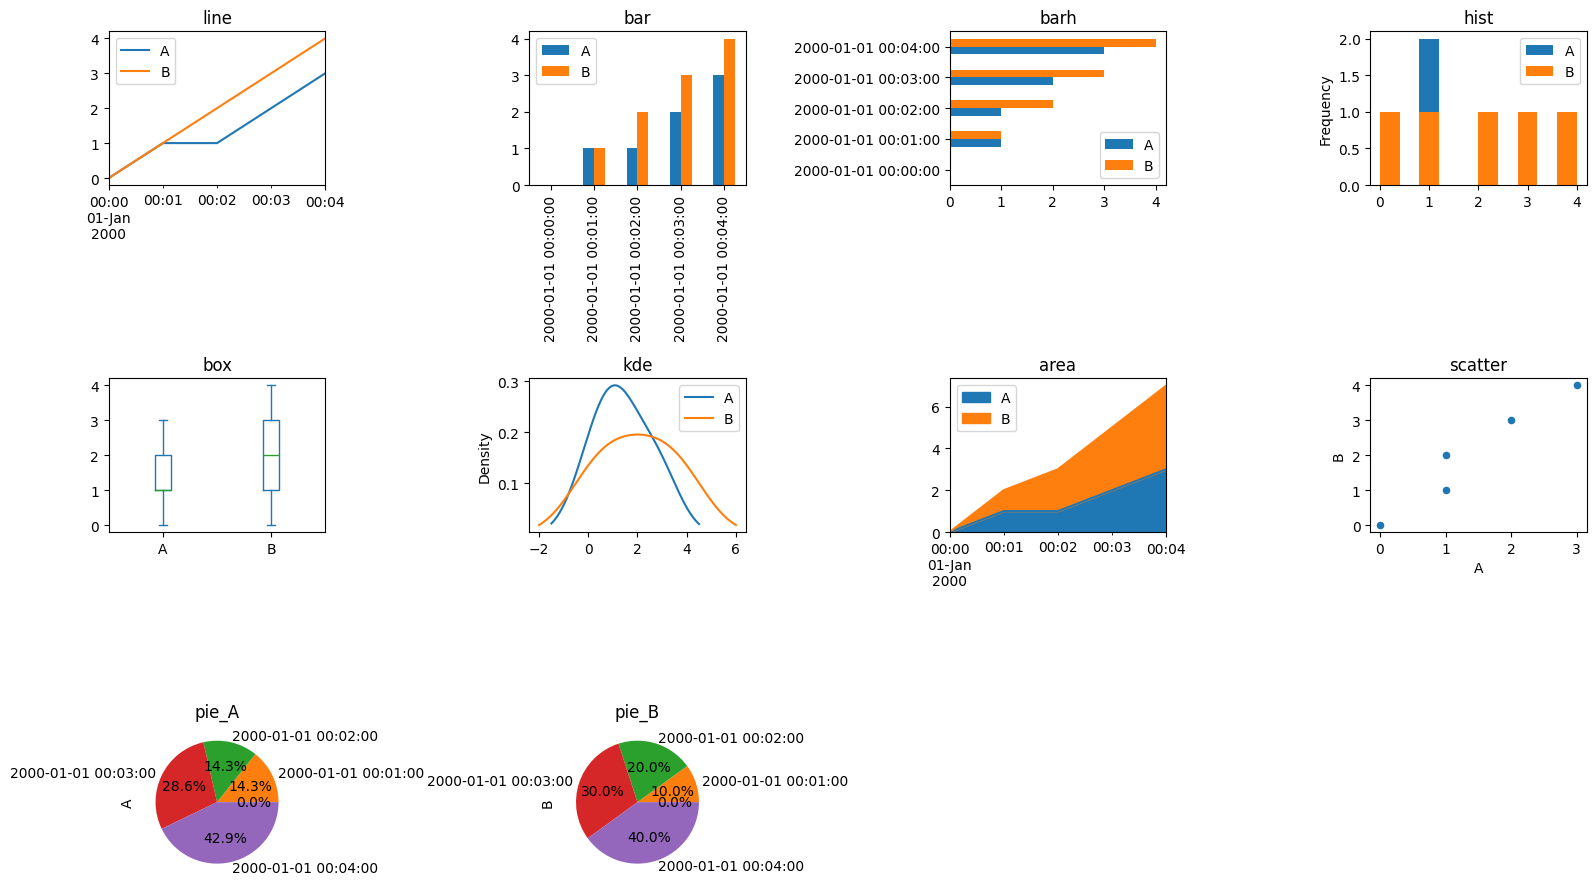

In [ ]:
import matplotlib.pyplot as plt

index = pd.date_range('1/1/2000', periods=5, freq='min')
df = pd.DataFrame({'A': [0, 1, 1, 2, 3],
                   'B': [0, 1, 2, 3, 4]}, 
                   index=index)
display(df)

kinds = ['line', 'bar', 'barh', 'hist', 'box', 'kde', 'area', 'pie']
n = len(kinds)
rows = 3
cols = 4  

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
axes = axes.flatten()

df.plot(kind='line', ax=axes[0], title='line')
df.plot(kind='bar', ax=axes[1], title='bar')
df.plot(kind='barh', ax=axes[2], title='barh')
df.plot(kind='hist', ax=axes[3], title='hist')
df.plot(kind='box', ax=axes[4], title='box')
df.plot(kind='kde', ax=axes[5], title='kde')
df.plot(kind='area', ax=axes[6], title='area')
df.plot(kind='scatter', x='A', y='B', ax=axes[7], title='scatter')
df['A'].plot(kind='pie', ax=axes[8], autopct='%1.1f%%', title='pie_A')
df['B'].plot(kind='pie', ax=axes[9], autopct='%1.1f%%', title='pie_B')


fig.delaxes(axes[10])
fig.delaxes(axes[11])

plt.tight_layout()
plt.show()

## 5.2. Options.

### 5.2.1. General.

<Axes: xlabel='hi', ylabel='bye'>

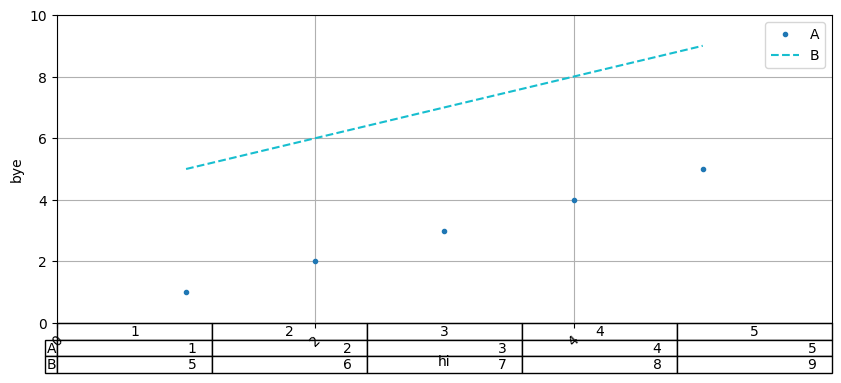

In [ ]:
df = pd.DataFrame({
    'A': range(1, 6),
    'B': range(5, 10)
}, index=range(1, 6))

df.plot(figsize=(10, 4),             # figsize.
        use_index=True,              # use idx for x-axis or not.
        grid=True,                   # draw grid or not.
        legend=True,                 # place legend or not.
        style=['.', '--'],           # style for each column.
        logx=False,                  # use log scaling for x-axis.
        logy=False,                  # use log scaling for y-axis.
        xticks=[0, 2, 4],            # values for x-axis.
        yticks=range(0, 12, 2),      # values for y-axis.
        xlim=[0, 6],                 # the range of x-axis.
        ylim=[0, 10],                # the range of y-axis.
        xlabel='hi',                 # label for x-axis.
        ylabel='bye',                # label for y-axis.
        rot=45,                      # rotate x-ticks.
        fontsize=10,                 # font size for x/y-ticks.
        colormap='tab10',            # colormap.
        table=True,                  # draw a table for each index and value.
        backend=None,                # backend to plot. default=matplotlib.
        )

### 5.2.2. `'stacked'`.

<Axes: title={'center': 'bar'}>

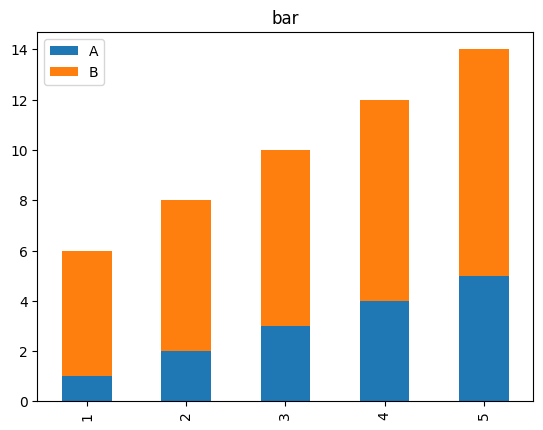

In [ ]:
# 'stacked', for 'bar' and 'area'.
df.plot(kind='bar', title='bar', stacked=True)

### 5.2.3. Secondary y-axis.

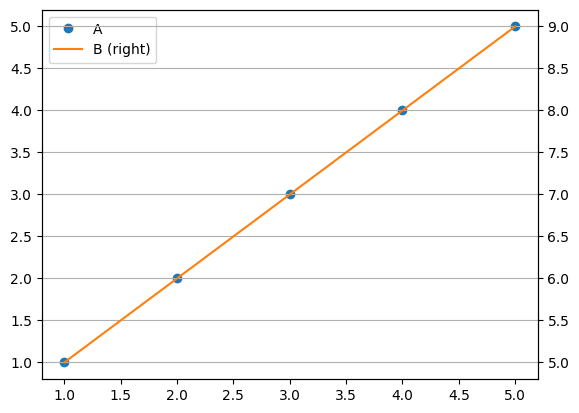

In [ ]:
df = pd.DataFrame({
    'A': range(1, 6),
    'B': range(5, 10)
}, index=range(1, 6))

# Plot with B on secondary y-axis
ax = df.plot(
    secondary_y='B',
    mark_right=True,        # Legend shows "(right)" for secondary axis
    grid=True,
    style=['o', '-']
)


## 5.3. Subplots.

array([[<Axes: >, <Axes: >]], dtype=object)

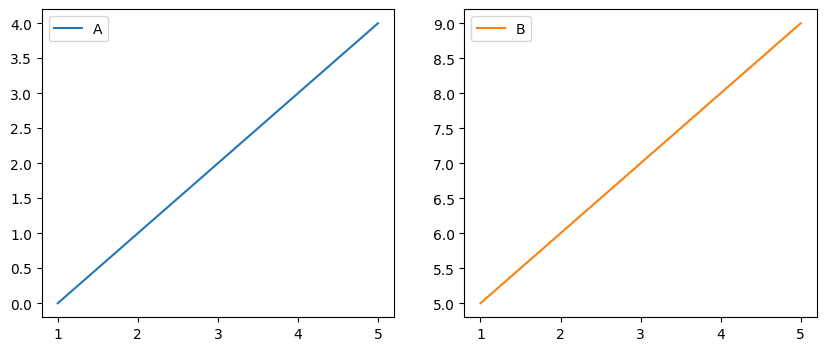

In [ ]:
df = pd.DataFrame({
    'A': range(5),
    'B': range(5, 10)
}, index=range(1, 6))

df.plot(subplots=True,
        sharex=True,
        sharey=False,
        layout=(1, 2),
        figsize=(10, 4),
        )


## 5.4. Errors.

<Axes: xlabel='hi', ylabel='bye'>

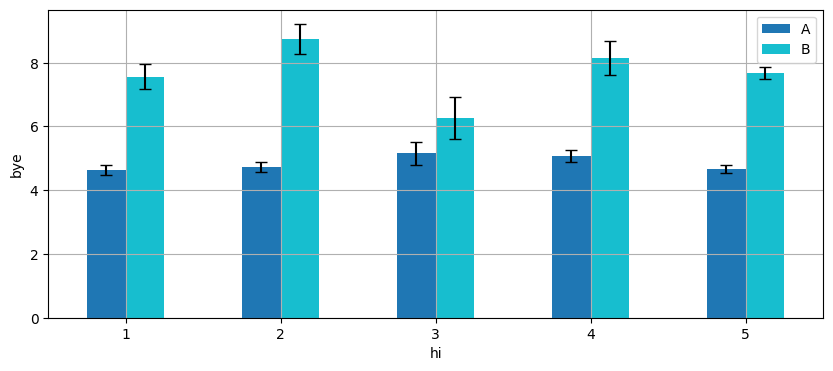

In [ ]:
df = pd.DataFrame({
    'group': np.tile(range(1, 6), 3),  # 5 groups, 3 samples each
    'A': np.random.normal(loc=5, scale=1, size=15),
    'B': np.random.normal(loc=8, scale=2, size=15)
})

grouped = df.groupby('group')
means = grouped.mean()
err_std = grouped.std()
err_sem = err_std / np.sqrt(len(df))

fig, ax = plt.subplots(figsize=(10, 4))
means.plot(
    kind='bar',
    yerr=err_sem,
    ax=ax,
    capsize=4,
    grid=True,
    legend=True,
    colormap='tab10',
    rot=0,
    xlabel='hi',
    ylabel='bye'
)


# 6. Miscellaneous.

## 6.1. Export.

In [ ]:
df = pd.DataFrame({
    'A': np.random.normal(loc=5, scale=1, size=5),
    'B': np.random.normal(loc=5, scale=2, size=5)
})

display(df)

df.to_csv()
df.to_markdown()
df.to_dict()
df.to_json()
df.to_html()
df.to_string()
df.to_clipboard()

,A,B
0,5.274271,4.909041
1,4.019057,6.812817
2,4.486577,8.386779
3,6.208189,3.660090
4,3.663925,6.357364


## 6.2. Style.

- https://pandas.pydata.org/docs/user_guide/style.html

In [ ]:
df = pd.DataFrame({'A': [1, 2, 3]})
df.style.highlight_max()
df.style.format("{:.2f}")
df.style.background_gradient(cmap='Blues')

,A
0,1
1,2
2,3
